In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from DataTransformation import LowPassFilter,PrincipalComponentAnalysis
from TemporalAbstraction import NumericalAbstraction


plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"]=(20,5)
plt.rcParams["figure.dpi"]=100
plt.rcParams["lines.linewidth"]=2




In [90]:
df=pd.read_pickle("../../data/interim/02_Outlier_Removed_Data.pkl")
pridictor_col=list(df.columns[:6])



In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9009 entries, 2019-01-11 15:08:05.200000 to 2019-01-20 17:33:27.800000
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Accelerometer_x  9005 non-null   float64
 1   Accelerometer_y  8998 non-null   float64
 2   Accelerometer_z  8999 non-null   float64
 3   Gyroscope_x      8984 non-null   float64
 4   Gyroscope_y      8938 non-null   float64
 5   Gyroscope_z      8945 non-null   float64
 6   Participants     9009 non-null   object 
 7   Label            9009 non-null   object 
 8   Category         9009 non-null   object 
 9   Set              9009 non-null   int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 774.2+ KB


In [92]:
for col in pridictor_col:
    df[col] = df[col].interpolate()

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9009 entries, 2019-01-11 15:08:05.200000 to 2019-01-20 17:33:27.800000
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Accelerometer_x  9009 non-null   float64
 1   Accelerometer_y  9009 non-null   float64
 2   Accelerometer_z  9009 non-null   float64
 3   Gyroscope_x      9009 non-null   float64
 4   Gyroscope_y      9009 non-null   float64
 5   Gyroscope_z      9009 non-null   float64
 6   Participants     9009 non-null   object 
 7   Label            9009 non-null   object 
 8   Category         9009 non-null   object 
 9   Set              9009 non-null   int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 774.2+ KB


In [93]:
duration=df[df["Set"]==1].index[-1] - df[df["Set"]==1].index[0]
duration.seconds

34

In [94]:
for s in df["Set"].unique():
    duration=df[df["Set"]==s].index[-1] - df[df["Set"]==s].index[0]
    df.loc[(df["Set"]==s),"Duration"]=duration.seconds

df

,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Participants,Label,Category,Set,Duration
epoch (ms),,,,,,,,,,,
2019-01-11 15:08:05.200,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388,B,bench,heavy,30,16.0
2019-01-11 15:08:05.400,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708,B,bench,heavy,30,16.0
2019-01-11 15:08:05.600,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146,B,bench,heavy,30,16.0
2019-01-11 15:08:05.800,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730,B,bench,heavy,30,16.0
2019-01-11 15:08:06.000,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098,B,bench,heavy,30,16.0
...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.048000,-1.041500,-0.076500,1.4146,-5.6218,0.2926,E,row,medium,40,19.0
2019-01-20 17:33:27.200,-0.037000,-1.030333,-0.053333,-2.7684,-0.5854,2.2440,E,row,medium,40,19.0
2019-01-20 17:33:27.400,-0.060000,-1.031000,-0.082000,2.8416,-5.1342,-0.1220,E,row,medium,40,19.0


In [95]:
duration_df=df.groupby(["Category"])["Duration"].mean()
duration_df

Category
heavy       14.743501
medium      24.942529
sitting     33.000000
standing    39.000000
Name: Duration, dtype: float64

In [96]:
duration_df.iloc[0]/5

2.9487001733102254

In [97]:
duration_df.iloc[1]/10

2.4942528735632186

,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Participants,Label,Category,Set,Duration
epoch (ms),,,,,,,,,,,
2019-01-11 15:08:05.200,0.013494,0.977001,-0.070995,-1.896395,2.439080,0.939616,B,bench,heavy,30,16.0
2019-01-11 15:08:05.400,0.006869,0.970257,-0.067545,2.129685,0.528678,-1.248135,B,bench,heavy,30,16.0
2019-01-11 15:08:05.600,-0.009603,0.963589,-0.073447,4.151973,-2.092258,-0.929804,B,bench,heavy,30,16.0
2019-01-11 15:08:05.800,-0.022998,0.965441,-0.083731,2.074477,-3.626288,0.880509,B,bench,heavy,30,16.0
2019-01-11 15:08:06.000,-0.020032,0.966784,-0.093783,1.041930,-1.219897,-2.260590,B,bench,heavy,30,16.0
...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.045056,-0.974791,-0.061752,3.273522,-4.487268,0.133850,E,row,medium,40,19.0
2019-01-20 17:33:27.200,-0.042806,-1.020916,-0.057715,-2.514546,-2.449224,1.255524,E,row,medium,40,19.0
2019-01-20 17:33:27.400,-0.047074,-1.051656,-0.066326,-0.673530,-1.799975,1.193779,E,row,medium,40,19.0


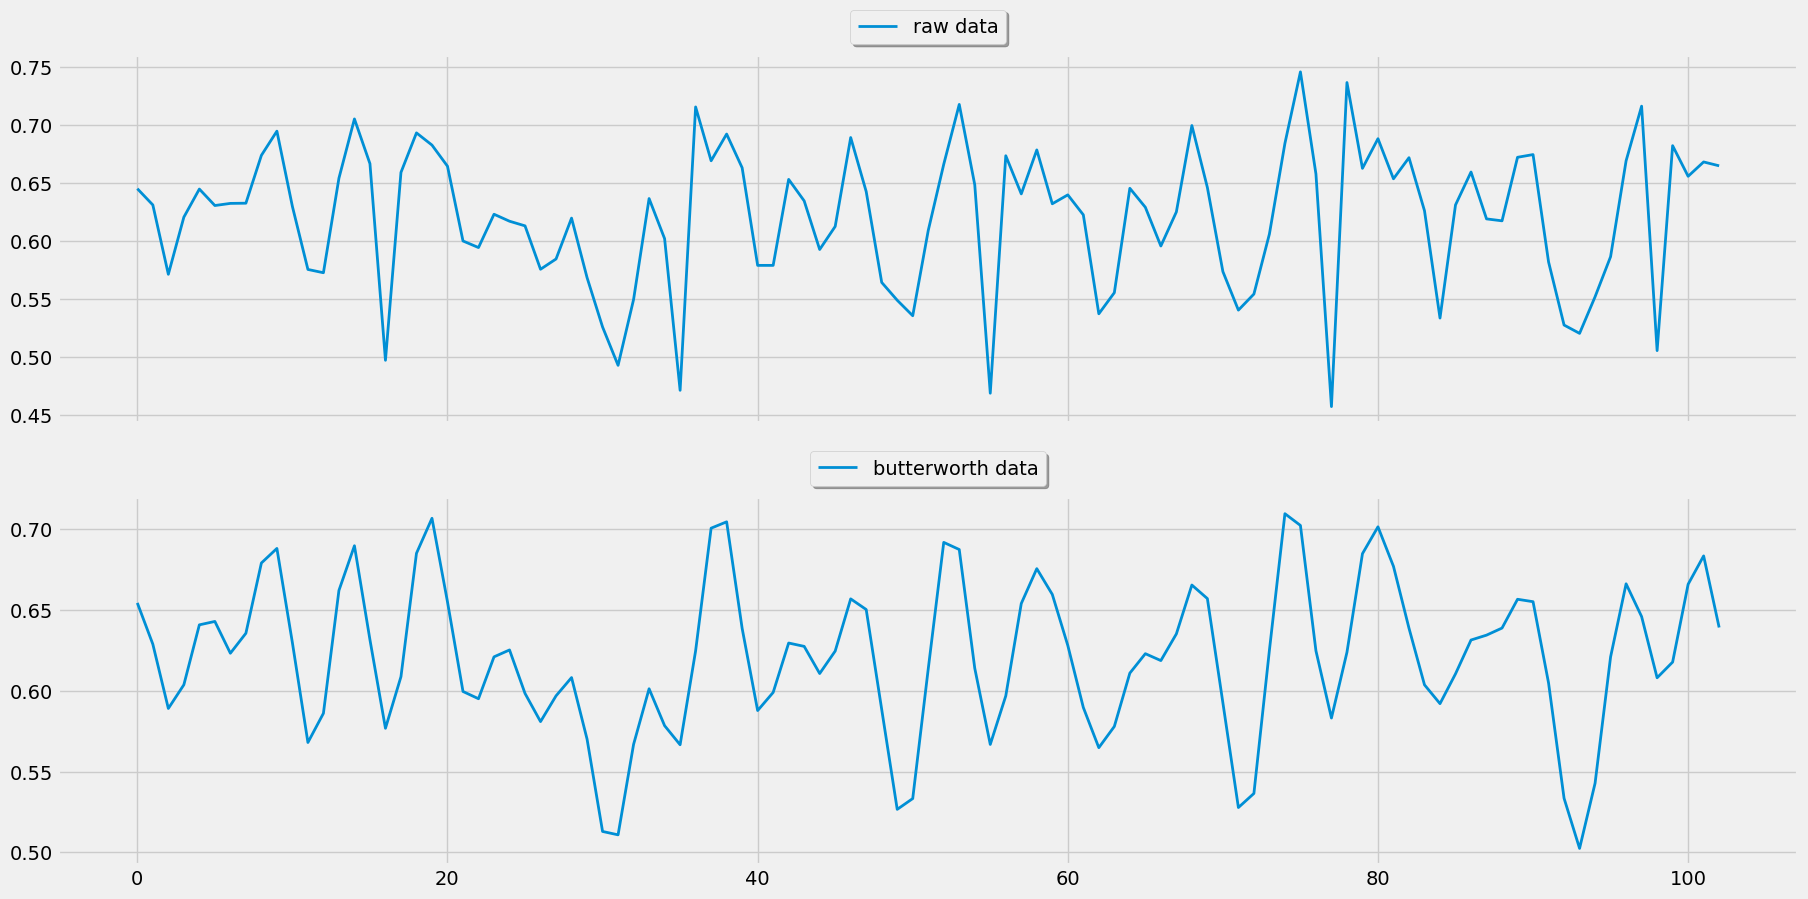

In [98]:
df_lowpass=df.copy()

LowPass=LowPassFilter()
fs=1000/200
cutoff=1.2


df_lowpass=LowPass.low_pass_filter(df_lowpass,"Accelerometer_y",fs,cutoff,order=5)
subset=df_lowpass[df_lowpass["Set"]==45]
fig,ax=plt.subplots(nrows=2,sharex=True,figsize=(20,10))
ax[0].plot(subset["Accelerometer_y"].reset_index(drop=True),label="raw data")
ax[1].plot(subset["Accelerometer_y_lowpass"].reset_index(drop=True),label="butterworth data") 
ax[0].legend(loc="upper center",bbox_to_anchor=(0.5,1.15),fancybox=True,shadow=True)
ax[1].legend(loc="upper center",bbox_to_anchor=(0.5,1.15),fancybox=True,shadow=True)  


# Make smooth graph at all col
for col in pridictor_col:
    df_lowpass=LowPass.low_pass_filter(df_lowpass,col,fs,cutoff)
    df_lowpass[col]=df_lowpass[col+"_lowpass"]
    del df_lowpass[col+"_lowpass"]

df_lowpass

In [99]:
df_pca=df_lowpass.copy()
PCA=PrincipalComponentAnalysis()
pc_values=PCA.determine_pc_explained_variance(df_pca,pridictor_col)
df_pca=PCA.apply_pca(df_pca,pridictor_col,3)
df_pca

,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Participants,Label,Category,Set,Duration,pca_1,pca_2,pca_3
epoch (ms),,,,,,,,,,,,,,
2019-01-11 15:08:05.200,0.013494,0.977001,-0.070995,-1.896395,2.439080,0.939616,B,bench,heavy,30,16.0,-0.317491,-0.075816,0.070520
2019-01-11 15:08:05.400,0.006869,0.970257,-0.067545,2.129685,0.528678,-1.248135,B,bench,heavy,30,16.0,-0.315555,-0.075282,0.070565
2019-01-11 15:08:05.600,-0.009603,0.963589,-0.073447,4.151973,-2.092258,-0.929804,B,bench,heavy,30,16.0,-0.314780,-0.081915,0.065980
2019-01-11 15:08:05.800,-0.022998,0.965441,-0.083731,2.074477,-3.626288,0.880509,B,bench,heavy,30,16.0,-0.316880,-0.090205,0.060065
2019-01-11 15:08:06.000,-0.020032,0.966784,-0.093783,1.041930,-1.219897,-2.260590,B,bench,heavy,30,16.0,-0.317350,-0.095463,0.063173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.045056,-0.974791,-0.061752,3.273522,-4.487268,0.133850,E,row,medium,40,19.0,0.346775,-0.147540,-0.051285
2019-01-20 17:33:27.200,-0.042806,-1.020916,-0.057715,-2.514546,-2.449224,1.255524,E,row,medium,40,19.0,0.362725,-0.146231,-0.059154
2019-01-20 17:33:27.400,-0.047074,-1.051656,-0.066326,-0.673530,-1.799975,1.193779,E,row,medium,40,19.0,0.372734,-0.153069,-0.058939


<Axes: xlabel='epoch (ms)'>

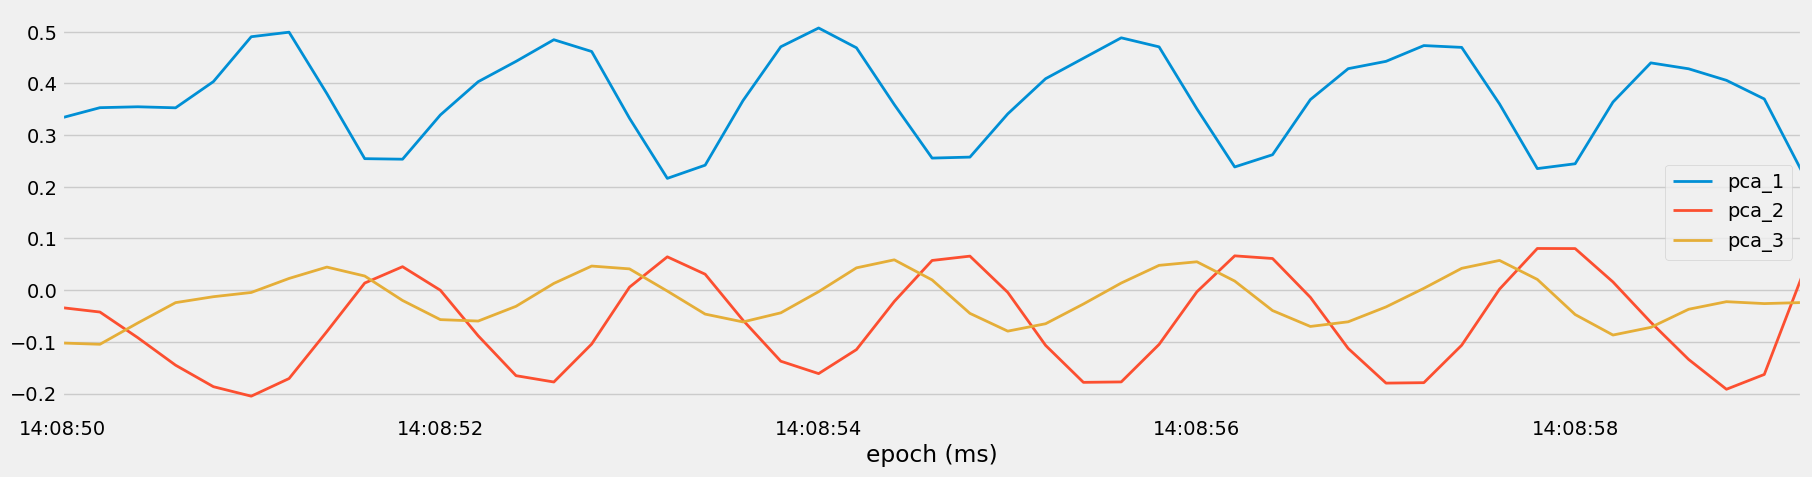

In [100]:
subset=df_pca[df_pca["Set"]==35]
subset[["pca_1","pca_2","pca_3"]].plot()

In [101]:
df_squared=df_pca.copy()
acc_r=df_squared["Accelerometer_x"]**2+df_squared["Accelerometer_y"]**2+df_squared["Accelerometer_z"]**2
gyro_r=df_squared["Gyroscope_x"]**2+df_squared["Gyroscope_y"]**2+df_squared["Gyroscope_z"]**2
df_squared["Accelerometer_r"]=np.sqrt(acc_r)
df_squared["Gyroscope_r"]=np.sqrt(gyro_r)
df_squared=df_squared.drop(columns=["Duration"])
df_squared

,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Participants,Label,Category,Set,pca_1,pca_2,pca_3,Accelerometer_r,Gyroscope_r
epoch (ms),,,,,,,,,,,,,,,
2019-01-11 15:08:05.200,0.013494,0.977001,-0.070995,-1.896395,2.439080,0.939616,B,bench,heavy,30,-0.317491,-0.075816,0.070520,0.979670,3.229288
2019-01-11 15:08:05.400,0.006869,0.970257,-0.067545,2.129685,0.528678,-1.248135,B,bench,heavy,30,-0.315555,-0.075282,0.070565,0.972630,2.524460
2019-01-11 15:08:05.600,-0.009603,0.963589,-0.073447,4.151973,-2.092258,-0.929804,B,bench,heavy,30,-0.314780,-0.081915,0.065980,0.966432,4.741409
2019-01-11 15:08:05.800,-0.022998,0.965441,-0.083731,2.074477,-3.626288,0.880509,B,bench,heavy,30,-0.316880,-0.090205,0.060065,0.969338,4.269510
2019-01-11 15:08:06.000,-0.020032,0.966784,-0.093783,1.041930,-1.219897,-2.260590,B,bench,heavy,30,-0.317350,-0.095463,0.063173,0.971528,2.772009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.045056,-0.974791,-0.061752,3.273522,-4.487268,0.133850,E,row,medium,40,0.346775,-0.147540,-0.051285,0.977783,5.556027
2019-01-20 17:33:27.200,-0.042806,-1.020916,-0.057715,-2.514546,-2.449224,1.255524,E,row,medium,40,0.362725,-0.146231,-0.059154,1.023441,3.727999
2019-01-20 17:33:27.400,-0.047074,-1.051656,-0.066326,-0.673530,-1.799975,1.193779,E,row,medium,40,0.372734,-0.153069,-0.058939,1.054796,2.262446


In [102]:
subset=df_squared[df_squared["Set"]==18]
subset

,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Participants,Label,Category,Set,pca_1,pca_2,pca_3,Accelerometer_r,Gyroscope_r
epoch (ms),,,,,,,,,,,,,,,
2019-01-15 19:04:09.000,0.231483,0.146942,0.563789,0.900727,-5.782011,1.429212,A,squat,heavy,18,0.001440,0.305049,-0.011263,0.626925,6.023753
2019-01-15 19:04:09.200,0.306896,0.655466,0.813936,7.362703,-4.724756,0.213729,A,squat,heavy,18,-0.160000,0.481948,-0.000706,1.089179,8.750909
2019-01-15 19:04:09.400,0.301700,0.706809,0.810545,9.157017,-3.398556,-1.442984,A,squat,heavy,18,-0.178068,0.480829,0.002260,1.116954,9.873366
2019-01-15 19:04:09.600,0.269868,0.564737,0.696995,6.309976,-3.585901,-1.415419,A,squat,heavy,18,-0.134997,0.403985,0.003181,0.936780,7.394450
2019-01-15 19:04:09.800,0.260825,0.525272,0.636215,0.025551,-3.895389,0.409019,A,squat,heavy,18,-0.123929,0.365545,0.004308,0.865280,3.916887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-15 19:04:25.000,0.306685,0.516997,0.615744,-6.472338,-2.464898,4.783879,A,squat,heavy,18,-0.117861,0.361341,0.022246,0.860514,8.417386
2019-01-15 19:04:25.200,0.351972,0.552237,0.697095,-3.014426,-3.730499,1.109863,A,squat,heavy,18,-0.123952,0.417939,0.030187,0.956448,4.922924
2019-01-15 19:04:25.400,0.369700,0.568794,0.753990,8.317781,-4.959873,-1.414131,A,squat,heavy,18,-0.126390,0.454715,0.037574,1.014251,9.787011


array([<Axes: xlabel='epoch (ms)'>, <Axes: xlabel='epoch (ms)'>],
      dtype=object)

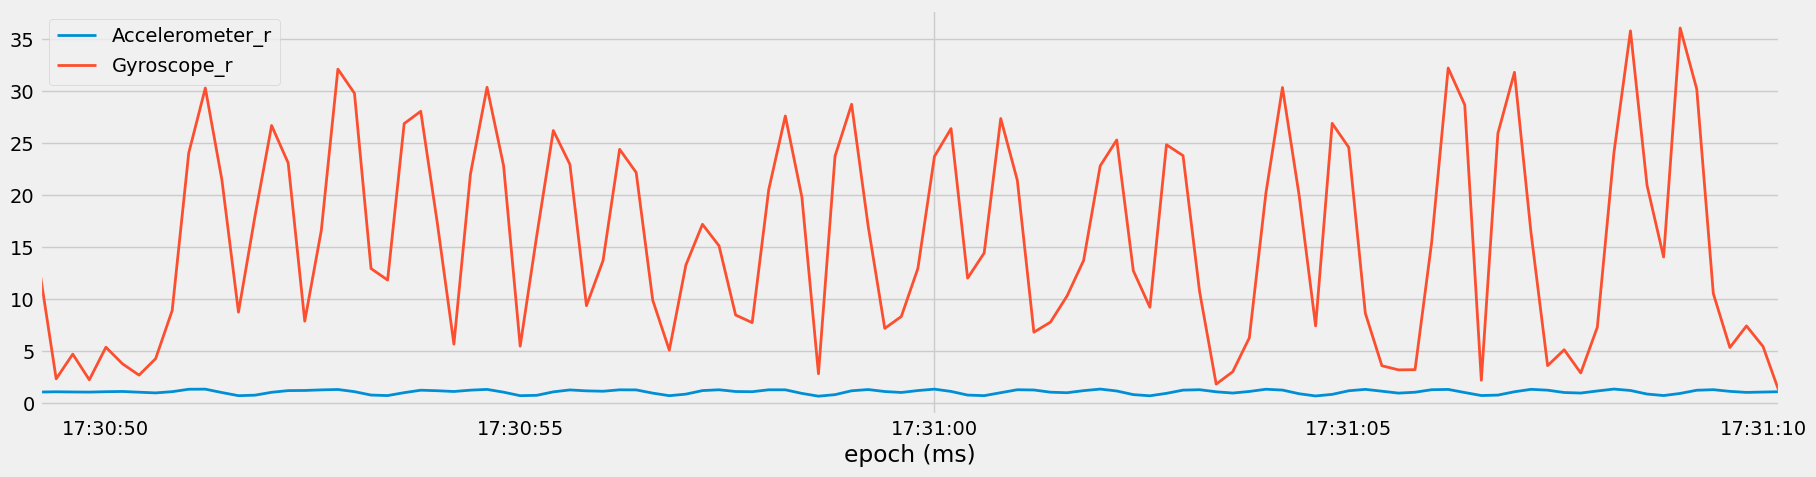

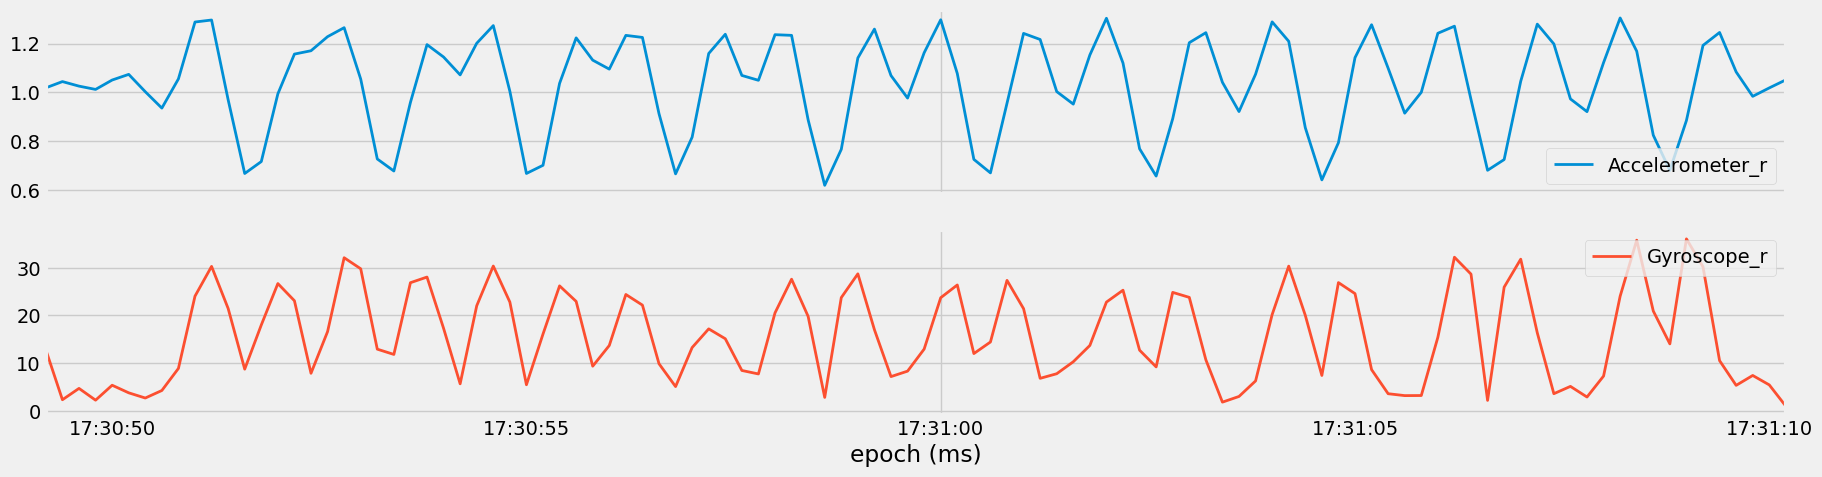

In [103]:
subset=df_squared[df_squared["Set"]==14]
subset[["Accelerometer_r","Gyroscope_r"]].plot()
subset[["Accelerometer_r","Gyroscope_r"]].plot(subplots=True)

In [104]:
df_temporal=df_squared.copy()
df_temporal

,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Participants,Label,Category,Set,pca_1,pca_2,pca_3,Accelerometer_r,Gyroscope_r
epoch (ms),,,,,,,,,,,,,,,
2019-01-11 15:08:05.200,0.013494,0.977001,-0.070995,-1.896395,2.439080,0.939616,B,bench,heavy,30,-0.317491,-0.075816,0.070520,0.979670,3.229288
2019-01-11 15:08:05.400,0.006869,0.970257,-0.067545,2.129685,0.528678,-1.248135,B,bench,heavy,30,-0.315555,-0.075282,0.070565,0.972630,2.524460
2019-01-11 15:08:05.600,-0.009603,0.963589,-0.073447,4.151973,-2.092258,-0.929804,B,bench,heavy,30,-0.314780,-0.081915,0.065980,0.966432,4.741409
2019-01-11 15:08:05.800,-0.022998,0.965441,-0.083731,2.074477,-3.626288,0.880509,B,bench,heavy,30,-0.316880,-0.090205,0.060065,0.969338,4.269510
2019-01-11 15:08:06.000,-0.020032,0.966784,-0.093783,1.041930,-1.219897,-2.260590,B,bench,heavy,30,-0.317350,-0.095463,0.063173,0.971528,2.772009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.045056,-0.974791,-0.061752,3.273522,-4.487268,0.133850,E,row,medium,40,0.346775,-0.147540,-0.051285,0.977783,5.556027
2019-01-20 17:33:27.200,-0.042806,-1.020916,-0.057715,-2.514546,-2.449224,1.255524,E,row,medium,40,0.362725,-0.146231,-0.059154,1.023441,3.727999
2019-01-20 17:33:27.400,-0.047074,-1.051656,-0.066326,-0.673530,-1.799975,1.193779,E,row,medium,40,0.372734,-0.153069,-0.058939,1.054796,2.262446


In [105]:
df_temporal=df_squared.copy()
NumAbs=NumericalAbstraction()

pridictor_col=pridictor_col+["Accelerometer_r","Gyroscope_r"]

ws=int(1000/200)
for col in pridictor_col:
    df_temporal=NumAbs.abstract_numerical(df_temporal,[col],ws,"mean")
    df_temporal=NumAbs.abstract_numerical(df_temporal,[col],ws,"std")
df_temporal_list=[]
for s in df_temporal["Set"].unique():
    subset=df_temporal[df_temporal["Set"]==s].copy()
    for col in pridictor_col:
        subset=NumAbs.abstract_numerical(subset,[col],ws,"mean")
        subset=NumAbs.abstract_numerical(subset,[col],ws,"std")
    df_temporal_list.append(subset)

df_temporal=pd.concat(df_temporal_list)

df_temporal.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9009 entries, 2019-01-11 15:08:05.200000 to 2019-01-20 17:33:27.800000
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Accelerometer_x                 9009 non-null   float64
 1   Accelerometer_y                 9009 non-null   float64
 2   Accelerometer_z                 9009 non-null   float64
 3   Gyroscope_x                     9009 non-null   float64
 4   Gyroscope_y                     9009 non-null   float64
 5   Gyroscope_z                     9009 non-null   float64
 6   Participants                    9009 non-null   object 
 7   Label                           9009 non-null   object 
 8   Category                        9009 non-null   object 
 9   Set                             9009 non-null   int64  
 10  pca_1                           9009 non-null   float64
 11  pca_2                           9009 non-null

<Axes: xlabel='epoch (ms)'>

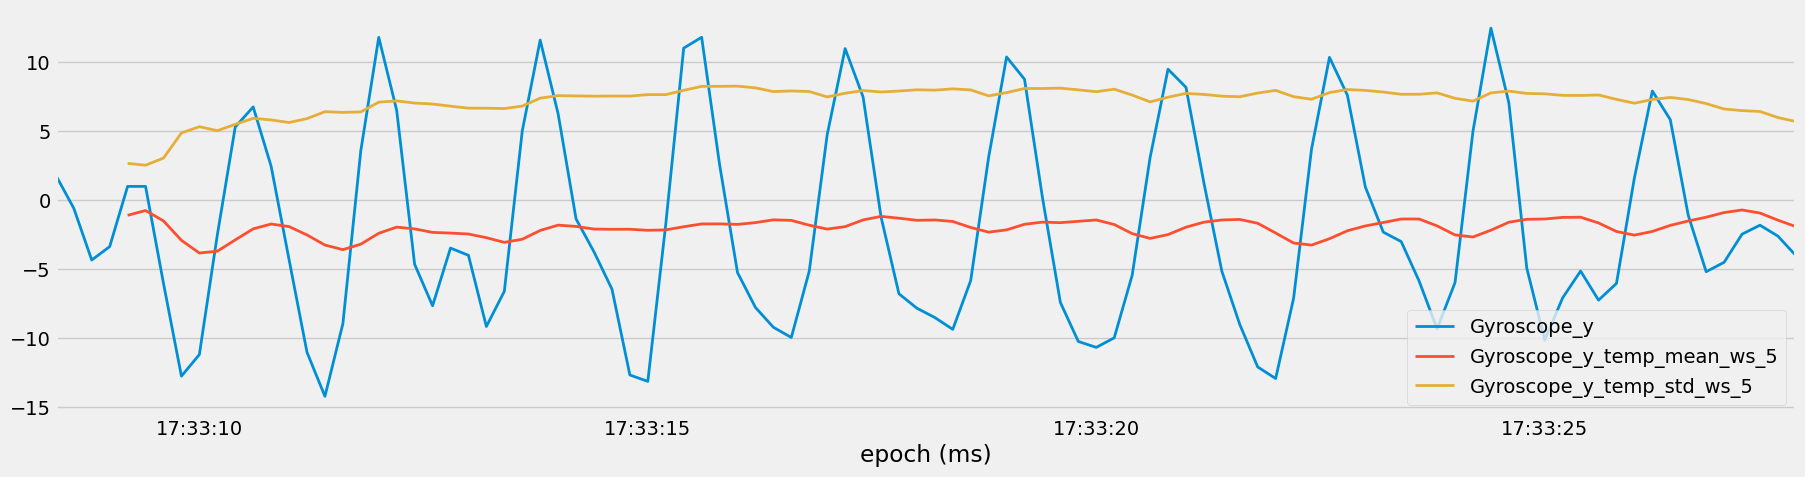

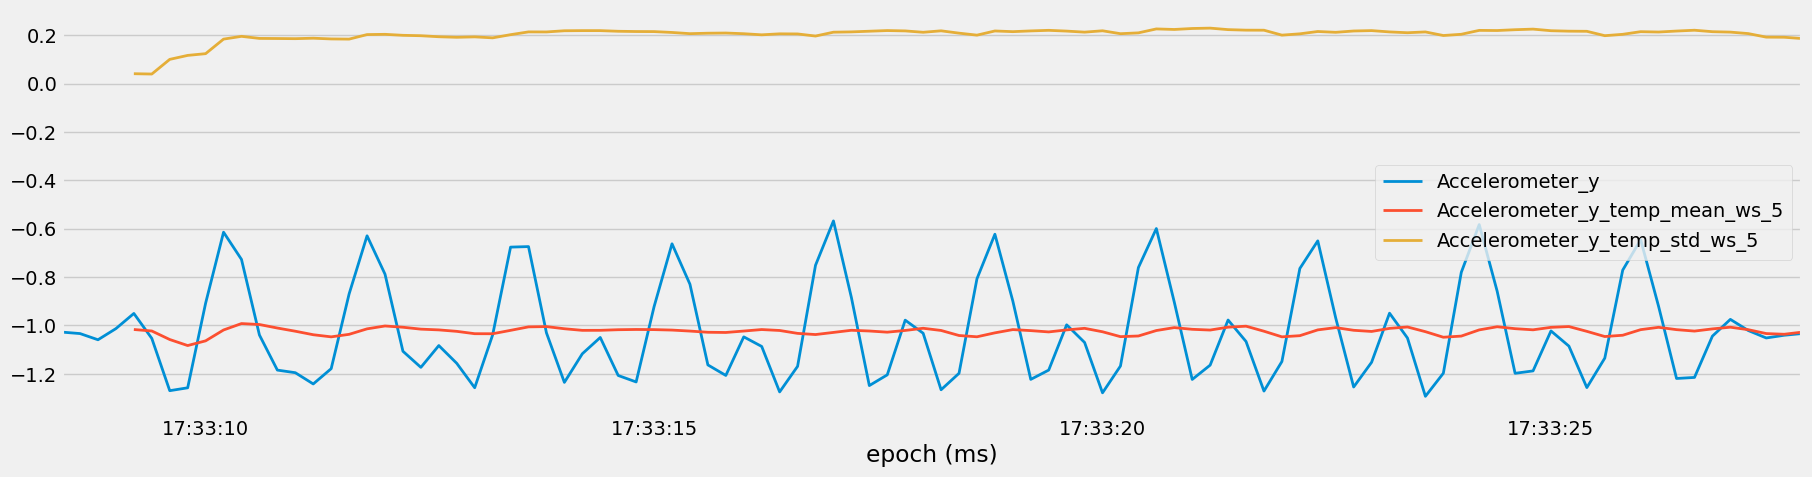

In [106]:
subset[["Gyroscope_y","Gyroscope_y_temp_mean_ws_5","Gyroscope_y_temp_std_ws_5"]].plot()
subset[["Accelerometer_y","Accelerometer_y_temp_mean_ws_5","Accelerometer_y_temp_std_ws_5"]].plot()

In [107]:
df_frq=df_temporal.copy().reset_index()
df_frq

,epoch (ms),Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Participants,Label,Category,...,Gyroscope_x_temp_mean_ws_5,Gyroscope_x_temp_std_ws_5,Gyroscope_y_temp_mean_ws_5,Gyroscope_y_temp_std_ws_5,Gyroscope_z_temp_mean_ws_5,Gyroscope_z_temp_std_ws_5,Accelerometer_r_temp_mean_ws_5,Accelerometer_r_temp_std_ws_5,Gyroscope_r_temp_mean_ws_5,Gyroscope_r_temp_std_ws_5
0,2019-01-11 15:08:05.200,0.013494,0.977001,-0.070995,-1.896395,2.439080,0.939616,B,bench,heavy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-11 15:08:05.400,0.006869,0.970257,-0.067545,2.129685,0.528678,-1.248135,B,bench,heavy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-11 15:08:05.600,-0.009603,0.963589,-0.073447,4.151973,-2.092258,-0.929804,B,bench,heavy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-11 15:08:05.800,-0.022998,0.965441,-0.083731,2.074477,-3.626288,0.880509,B,bench,heavy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-11 15:08:06.000,-0.020032,0.966784,-0.093783,1.041930,-1.219897,-2.260590,B,bench,heavy,...,1.500334,2.208213,-0.794137,2.350053,-0.523681,1.398179,0.971920,0.004937,3.507335,0.960196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9004,2019-01-20 17:33:27.000,-0.045056,-0.974791,-0.061752,3.273522,-4.487268,0.133850,E,row,medium,...,-1.363297,21.733237,-0.885026,6.614624,1.083092,9.081930,1.017141,0.201486,20.860282,12.217182
9005,2019-01-20 17:33:27.200,-0.042806,-1.020916,-0.057715,-2.514546,-2.449224,1.255524,E,row,medium,...,-2.113004,21.422167,-0.699098,6.497006,1.297288,9.017528,1.026779,0.195467,20.282182,12.682349
9006,2019-01-20 17:33:27.400,-0.047074,-1.051656,-0.066326,-0.673530,-1.799975,1.193779,E,row,medium,...,-1.462549,21.199084,-0.919617,6.434270,1.296122,9.017540,1.041611,0.181976,19.677470,13.177246
9007,2019-01-20 17:33:27.600,-0.049361,-1.040440,-0.066542,2.411744,-2.591221,0.659428,E,row,medium,...,-0.082986,20.223536,-1.437413,5.995137,1.114079,8.981090,1.044406,0.181427,18.457213,13.197807


In [108]:
from FrequencyAbstraction import FourierTransformation
FrqAbs=FourierTransformation()

fs= int(1000/200)
ws=int(2800/200)


df_frq_list=[]
for s in df_frq["Set"].unique():
    subset=df_frq[df_frq["Set"]==s].reset_index(drop=True).copy()
    subset=FrqAbs.abstract_frequency(subset,pridictor_col,ws,fs)
    df_frq_list.append(subset)

df_frq=pd.concat(df_frq_list).set_index("epoch (ms)",drop=True)
df_frq

,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Participants,Label,Category,Set,...,Gyroscope_r_freq_weighted,Gyroscope_r_pse,Gyroscope_r_freq_0.0_Hz_ws_14,Gyroscope_r_freq_0.357_Hz_ws_14,Gyroscope_r_freq_0.714_Hz_ws_14,Gyroscope_r_freq_1.071_Hz_ws_14,Gyroscope_r_freq_1.429_Hz_ws_14,Gyroscope_r_freq_1.786_Hz_ws_14,Gyroscope_r_freq_2.143_Hz_ws_14,Gyroscope_r_freq_2.5_Hz_ws_14
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:05.200,0.013494,0.977001,-0.070995,-1.896395,2.439080,0.939616,B,bench,heavy,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:05.400,0.006869,0.970257,-0.067545,2.129685,0.528678,-1.248135,B,bench,heavy,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:05.600,-0.009603,0.963589,-0.073447,4.151973,-2.092258,-0.929804,B,bench,heavy,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:05.800,-0.022998,0.965441,-0.083731,2.074477,-3.626288,0.880509,B,bench,heavy,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:06.000,-0.020032,0.966784,-0.093783,1.041930,-1.219897,-2.260590,B,bench,heavy,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.045056,-0.974791,-0.061752,3.273522,-4.487268,0.133850,E,row,medium,40,...,-0.289293,0.0,315.378553,-32.966667,25.312515,9.456436,-2.814943,-48.443419,-0.900828,-0.225067
2019-01-20 17:33:27.200,-0.042806,-1.020916,-0.057715,-2.514546,-2.449224,1.255524,E,row,medium,40,...,0.509833,0.0,304.825579,-41.572736,57.022041,78.579281,-21.898935,55.881245,14.102476,9.598016
2019-01-20 17:33:27.400,-0.047074,-1.051656,-0.066326,-0.673530,-1.799975,1.193779,E,row,medium,40,...,0.625087,0.0,266.538134,-67.414847,35.931545,37.829734,21.948169,22.258871,19.610711,29.452260


In [109]:
df_frq=df_frq.dropna()
df_frq=df_frq.iloc[::2]

In [110]:
from sklearn.cluster import KMeans
df_cluster=df_frq.copy()
cluster_col=["Accelerometer_x","Accelerometer_y","Accelerometer_z"]
k_values=range(2,10)
inertias=[]

for k in k_values:
    subset=df_cluster[cluster_col]
    kmeans=KMeans(n_clusters=k,n_init=20,random_state=0)
    cluster_label=kmeans.fit_predict(subset)
    inertias.append(kmeans.inertia_)



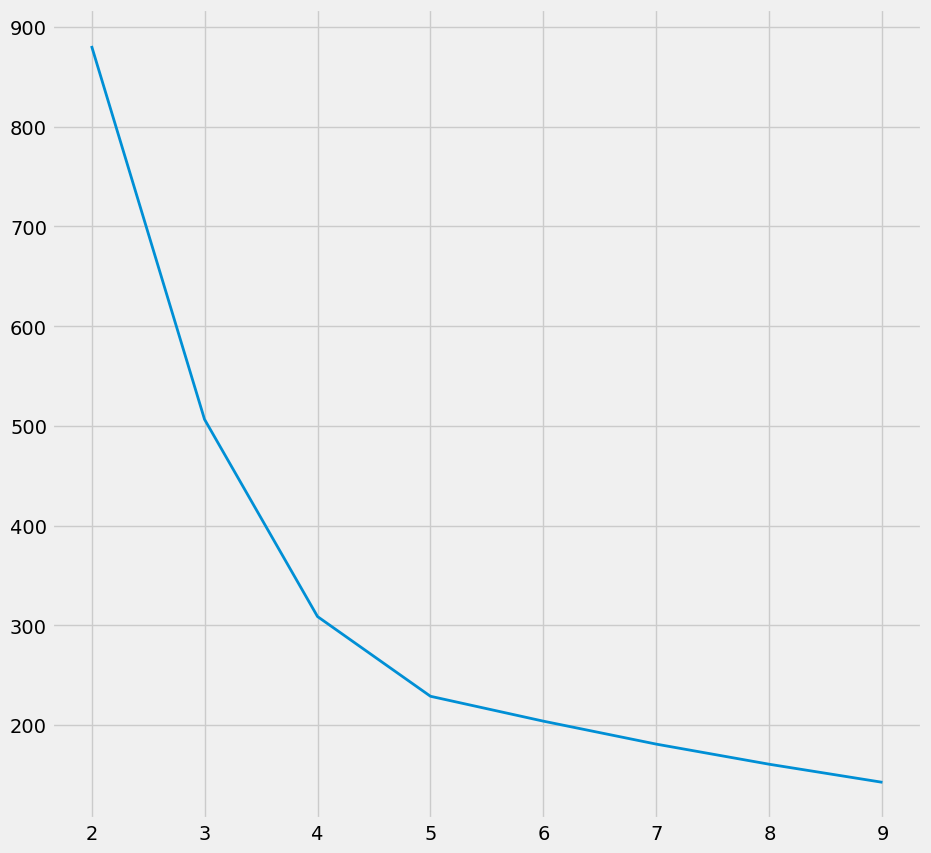

In [111]:
plt.figure(figsize=(10,10))
plt.plot(k_values,inertias)

In [112]:
kmeans=KMeans(n_clusters=5,n_init=20,random_state=0)
subset=df_cluster[cluster_col]
df_cluster["Cluster"]=kmeans.fit_predict(subset)

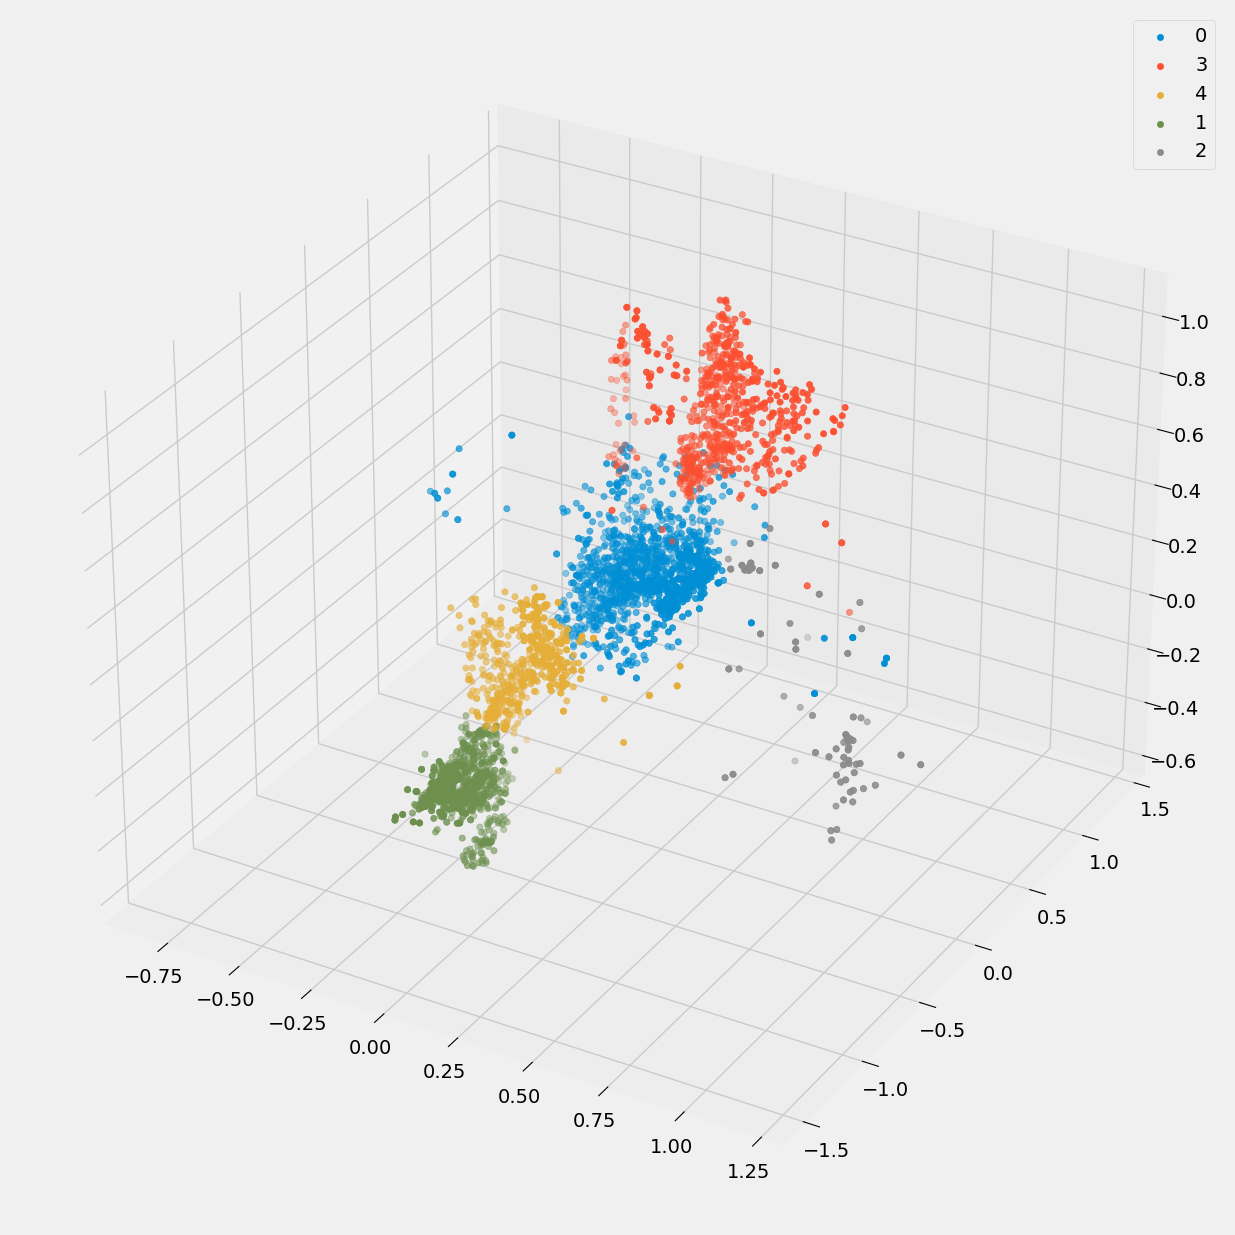

In [113]:
fig=plt.figure(figsize=(15,15))
ax=fig.add_subplot(projection="3d")
for c in df_cluster["Cluster"].unique():
    subset=df_cluster[df_cluster["Cluster"]==c]
    ax.scatter(subset["Accelerometer_x"],subset["Accelerometer_y"],subset["Accelerometer_z"],label=c)
plt.legend()
plt.show()

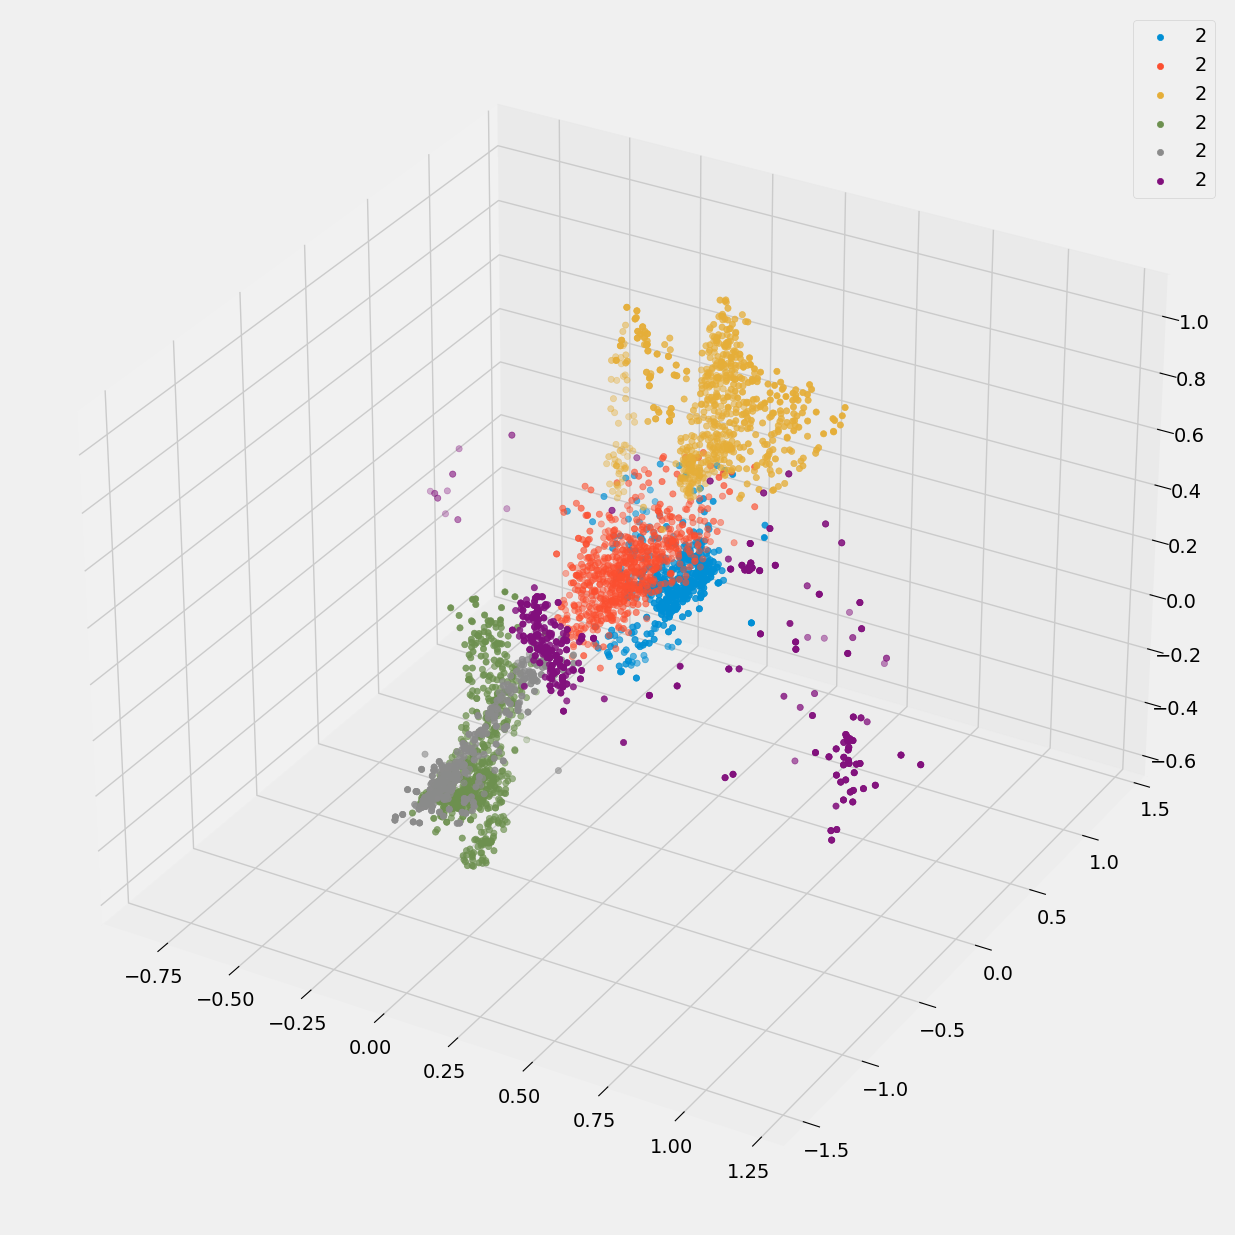

In [114]:
fig=plt.figure(figsize=(15,15))
ax=fig.add_subplot(projection="3d")
for i in df_cluster["Label"].unique():
    subset=df_cluster[df_cluster["Label"]==i]
    ax.scatter(subset["Accelerometer_x"],subset["Accelerometer_y"],subset["Accelerometer_z"],label=c)
plt.legend()
plt.show()

In [115]:
df_cluster

,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Participants,Label,Category,Set,...,Gyroscope_r_pse,Gyroscope_r_freq_0.0_Hz_ws_14,Gyroscope_r_freq_0.357_Hz_ws_14,Gyroscope_r_freq_0.714_Hz_ws_14,Gyroscope_r_freq_1.071_Hz_ws_14,Gyroscope_r_freq_1.429_Hz_ws_14,Gyroscope_r_freq_1.786_Hz_ws_14,Gyroscope_r_freq_2.143_Hz_ws_14,Gyroscope_r_freq_2.5_Hz_ws_14,Cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,-0.170494,0.888970,-0.172353,-25.990313,-10.162423,25.426906,B,bench,heavy,30,...,0.0,227.845540,-29.795388,18.195603,0.294594,-24.424951,11.515400,-51.920406,-13.567962,0
2019-01-11 15:08:08.400,-0.027634,0.878027,-0.056321,-4.311919,-1.963210,3.088785,B,bench,heavy,30,...,0.0,255.346459,-32.701710,-65.942225,-18.156214,5.435095,16.330497,4.416252,-1.494355,0
2019-01-11 15:08:08.800,-0.060139,0.982341,-0.036019,3.691356,-1.273743,-2.492890,B,bench,heavy,30,...,0.0,256.323480,-40.455694,-30.695845,3.361290,-10.888301,-51.138403,32.709146,-10.263861,0
2019-01-11 15:08:09.200,-0.048152,0.984179,-0.036625,-0.251944,-3.967927,4.930061,B,bench,heavy,30,...,0.0,247.684640,-30.828083,63.975047,6.797325,14.220152,38.695272,24.992977,-4.795215,0
2019-01-11 15:08:09.600,-0.043981,0.900329,-0.056932,11.319237,5.163204,-10.174713,B,bench,heavy,30,...,0.0,211.765064,-18.455294,21.941203,9.785602,10.100202,22.696284,-33.412821,-34.036843,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:26.200,0.061740,-0.921306,0.112441,-36.980345,7.916154,15.033379,E,row,medium,40,...,0.0,360.462098,25.374860,-48.513799,15.078979,-48.324601,-33.271836,-18.850747,-34.950958,4
2019-01-20 17:33:26.600,-0.022066,-1.214770,-0.111567,-4.451577,-1.081130,6.273530,E,row,medium,40,...,0.0,370.584934,34.584916,-17.726772,-16.241214,29.075325,73.198705,23.422109,10.144916,1
2019-01-20 17:33:27.000,-0.045056,-0.974791,-0.061752,3.273522,-4.487268,0.133850,E,row,medium,40,...,0.0,315.378553,-32.966667,25.312515,9.456436,-2.814943,-48.443419,-0.900828,-0.225067,1


In [116]:
df_cluster.to_pickle("../../data/interim/03_Featured_Data.pkl")